In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:/accident_severity_analytics/data/processed/Cleaned_US_Accidents.csv", parse_dates=["Start_Time", "End_Time", "Weather_Timestamp"])
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
0,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident,state route 32,...,False,False,False,True,False,Night,Night,Day,Day,30.000000
1,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident,i-75,...,False,False,False,False,False,Night,Day,Day,Day,30.000000
2,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident,miamisburg centerville road,...,False,False,False,True,False,Day,Day,Day,Day,30.000000
3,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident,westerville road,...,False,False,False,False,False,Day,Day,Day,Day,30.000000
4,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident,woodward avenue,...,False,False,False,False,False,Day,Day,Day,Day,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335823,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,Accident,pomona fwy,...,False,False,False,False,False,Day,Day,Day,Day,28.600000
6335824,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,Accident,i-8,...,False,False,False,False,False,Day,Day,Day,Day,26.883333
6335825,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,Accident,garden grove fwy,...,False,False,False,False,False,Day,Day,Day,Day,28.466667
6335826,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,Accident,san diego fwy,...,False,False,False,False,False,Day,Day,Day,Day,29.350000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335828 entries, 0 to 6335827
Data columns (total 42 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Weather_Timestamp      datetime64[ns]
 17  Temperature(F)         float64       
 18  Humidity(%)           

In [4]:
df.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
S

🟢1.Time Analysis

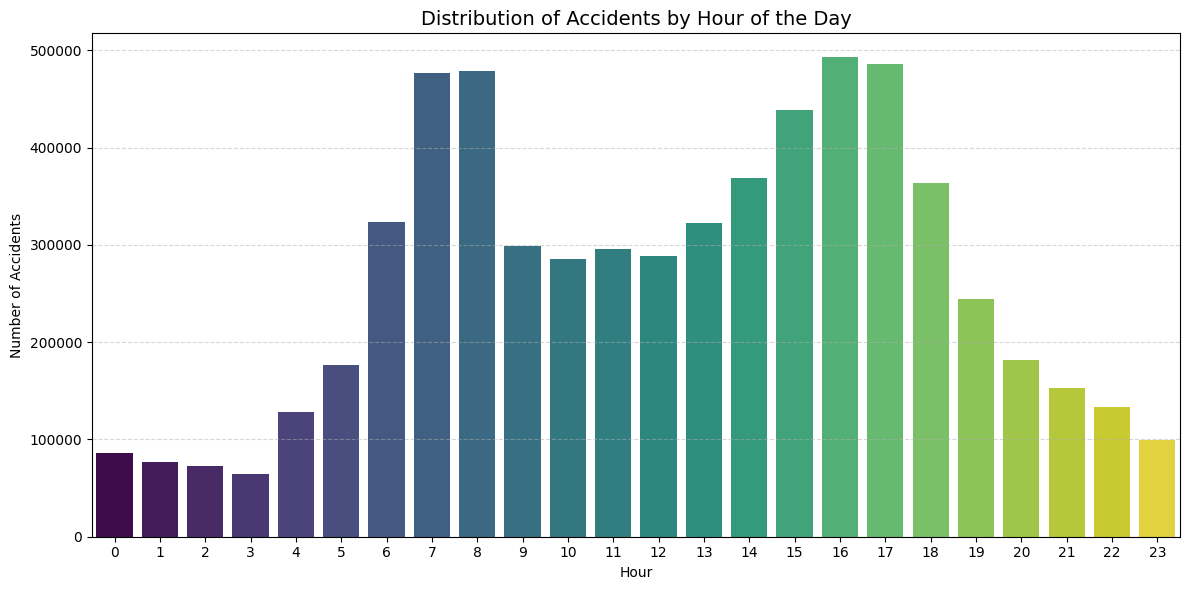

In [5]:
# تحديد اي ساعات في اليوم هي الاخطر
df["Hour"] = df["Start_Time"].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Hour", hue="Hour", palette="viridis", legend=False)
plt.title("Distribution of Accidents by Hour of the Day", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/hourly_accidents.png", dpi=300, bbox_inches="tight")
plt.show()

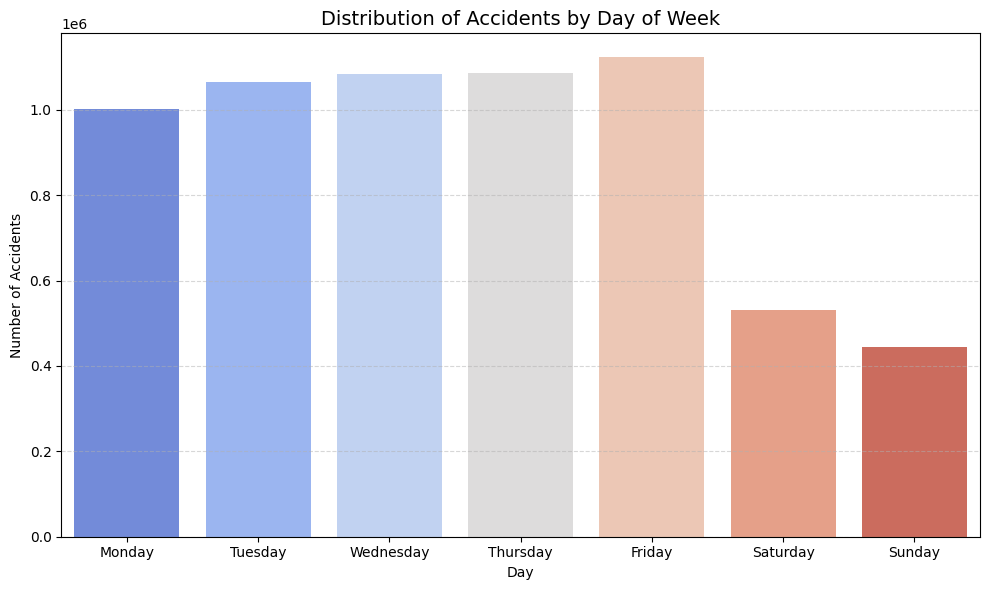

In [6]:
# توزيع الحوادث حسب اليوم

df["Day_of_Week"] = df["Start_Time"].dt.day_name()

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Day_of_Week", hue="Day_of_Week", order=order, palette="coolwarm", legend=False)
plt.title("Distribution of Accidents by Day of Week", fontsize=14)
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/day_of_week_accidents.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\Amer\AppData\Local\Temp\ipykernel_17412\1112984665.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Month_Name", order=month_order, palette="crest")


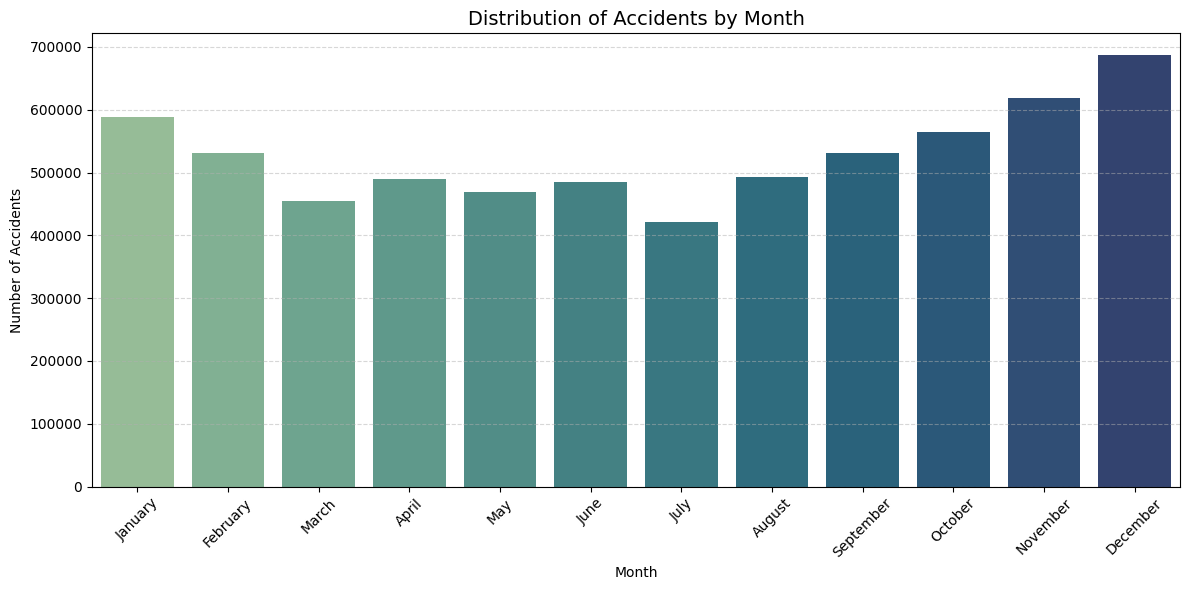

In [7]:
# توزيع الحوادث حسب الشهر

df["Month"] = df["Start_Time"].dt.month

import calendar
df["Month_Name"] = df["Month"].apply(lambda x: calendar.month_name[x])

month_order = list(calendar.month_name)[1:]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Month_Name", order=month_order, palette="crest")
plt.title("Distribution of Accidents by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/monthly_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


Average Accident Duration (filtered): 100.16 minutes


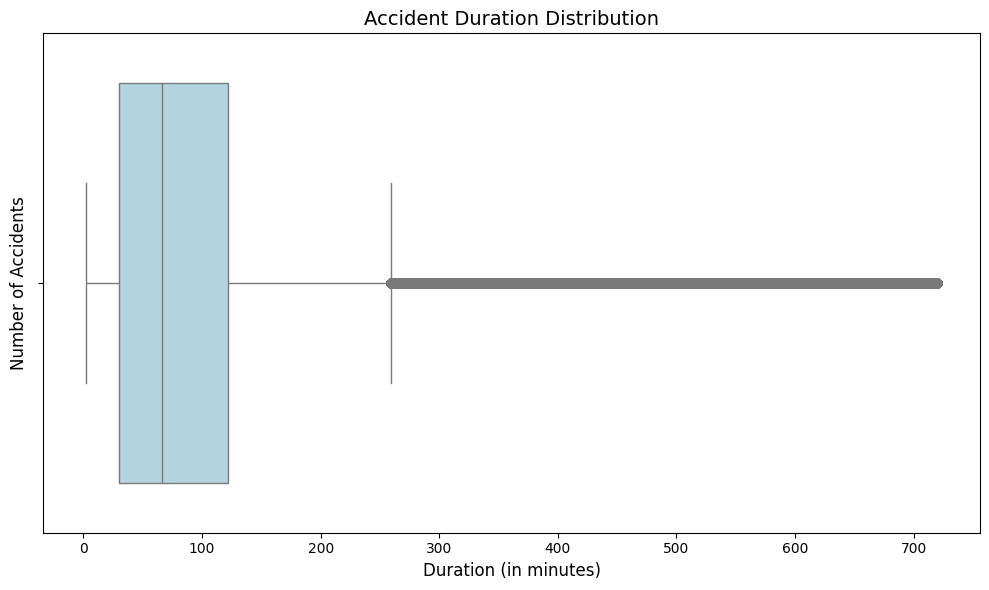

In [8]:
# ما هي مدة الحادث في المتوسط

mean_duration = df['Duration'].mean()
print(f"\nAverage Accident Duration (filtered): {mean_duration:.2f} minutes")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Duration', color='lightblue')
plt.title("Accident Duration Distribution", fontsize=14)
plt.xlabel("Duration (in minutes)", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/accident_duration_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


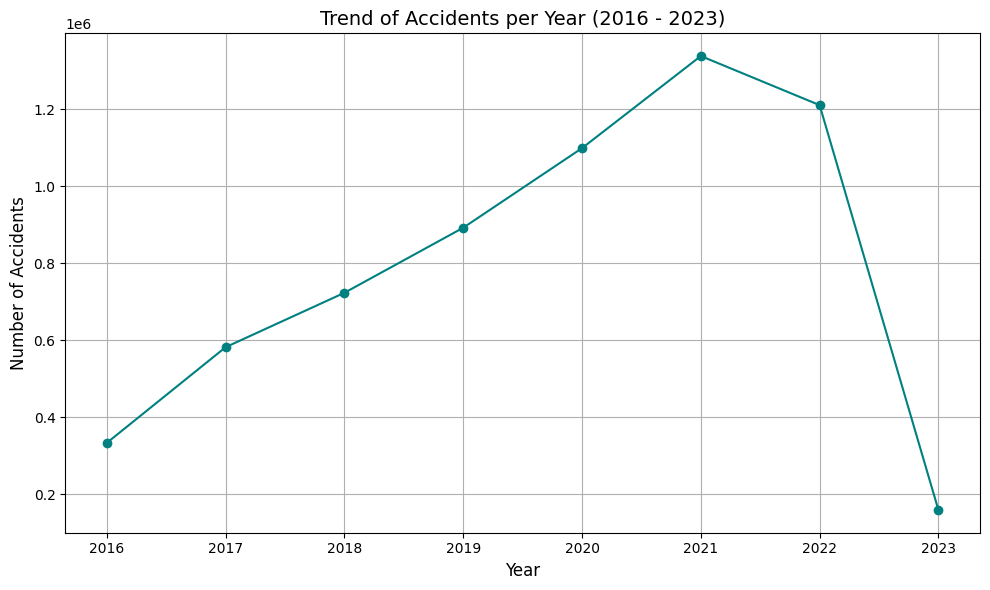

In [9]:
# تحليل الترند الزمني لحوادث السيارات من 2016 إلى 2023

df['Year'] = df['Start_Time'].dt.year

accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='line', marker='o', color='teal')
plt.title("Trend of Accidents per Year (2016 - 2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/trend_of_accidents.png", dpi=300, bbox_inches="tight")
plt.show()

🟢2.Location Analysis

In [10]:
#ما هي المدن والولايات و الشوارع الأكثر تعرضًا للحوادث

top_states = df['State'].value_counts().head(10)
print("Top 10 States with Most Accidents:")
print(top_states)

top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Cities with Most Accidents:")
print(top_cities)

top_streets = df['Street'].value_counts().head(10)
print("\nTop 10 Streets with Most Accidents:")
print(top_streets)

Top 10 States with Most Accidents:
State
CA    1397322
FL     709318
TX     500203
SC     319840
NY     289057
NC     279750
PA     236599
VA     232283
MN     162999
IL     154672
Name: count, dtype: int64

Top 10 Cities with Most Accidents:
City
Houston        144827
Miami          143854
Charlotte      119609
Dallas         116573
Los Angeles    116436
Orlando         87238
Austin          80749
Raleigh         73142
Nashville       63862
Baton Rouge     62109
Name: count, dtype: int64

Top 10 Streets with Most Accidents:
Street
i-95     140431
i-5      109617
i-10      98043
i-80      70422
i-75      56901
i-405     45201
i-15      43325
i-90      41421
i-94      38992
i-40      37757
Name: count, dtype: int64


In [11]:
#ما هي المسافات المقطوعة أثناء الحادث و ارتباطها بالخطورة

print("Distance Statistics:")
print(df['Distance(mi)'].describe())

Distance Statistics:
count    6.335828e+06
mean     5.115233e-01
std      1.541901e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e-02
75%      3.940000e-01
max      4.998000e+01
Name: Distance(mi), dtype: float64


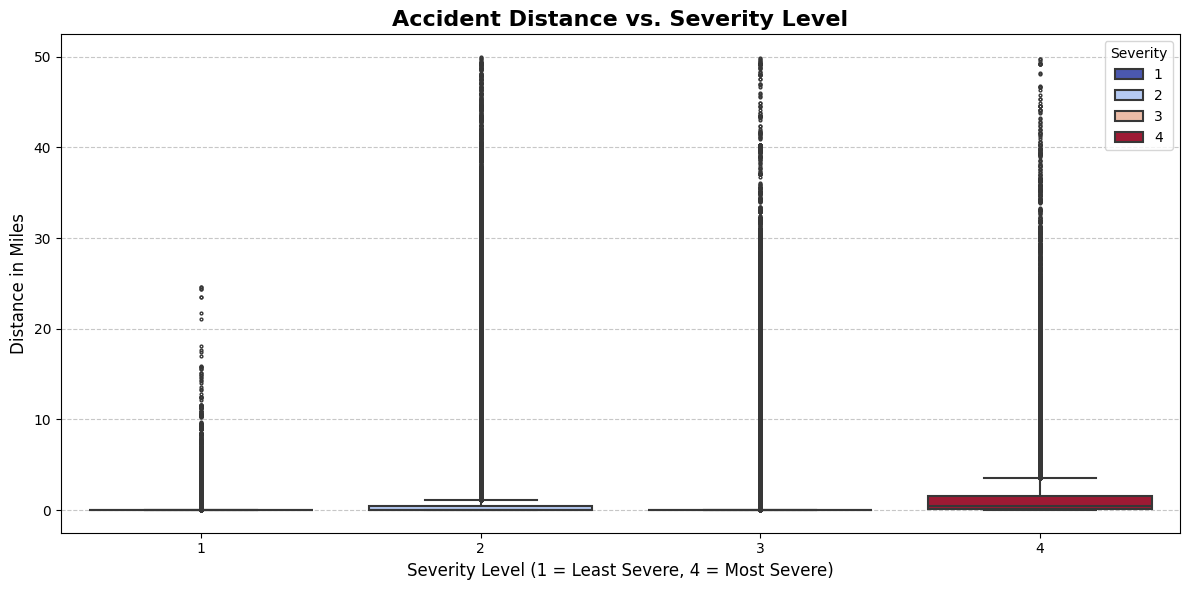

In [12]:
plt.figure(figsize=(12, 6))


sns.boxplot(data=df, x='Severity', y='Distance(mi)', hue='Severity', palette='coolwarm',linewidth=1.5,fliersize=2,dodge=False)

plt.title("Accident Distance vs. Severity Level", fontsize=16, fontweight='bold')
plt.xlabel("Severity Level (1 = Least Severe, 4 = Most Severe)", fontsize=12)
plt.ylabel("Distance in Miles", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/accident_vs_severity.png", dpi=300, bbox_inches="tight")

plt.show()

In [13]:
# (Heatmaps)توزيع جغرافي مرئي باستخدام 

import folium
from folium.plugins import HeatMap

m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)

heat_data = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000).values.tolist()

HeatMap(heat_data).add_to(m)
m.save("E:/accident_severity_analytics/reports/accidents_heatmap.html")
m

In [14]:
# الفرق في معدل الحوادث بين الولايات الحضرية والريفية

urban_rate = df[df['Amenity'] == True].shape[0] / df.shape[0] * 100
rural_rate = 100 - urban_rate
print(f"Urban Area Accidents: {urban_rate:.2f}%")
print(f"Rural Area Accidents: {rural_rate:.2f}%")

Urban Area Accidents: 1.25%
Rural Area Accidents: 98.75%


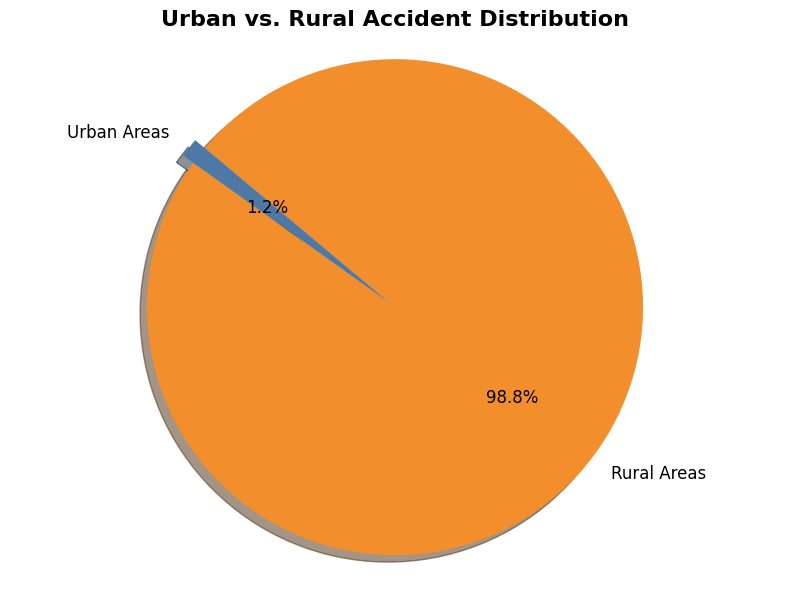

In [15]:
labels = ['Urban Areas', 'Rural Areas']
sizes = [urban_rate, rural_rate]
colors = ['#4e79a7', '#f28e2b'] 
explode = (0.05, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=140,textprops={'fontsize': 12})

plt.title("Urban vs. Rural Accident Distribution", fontsize=16, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/Urban_vs_Rural.png", dpi=300, bbox_inches="tight")

plt.show()

🟢3.Weather Analysis

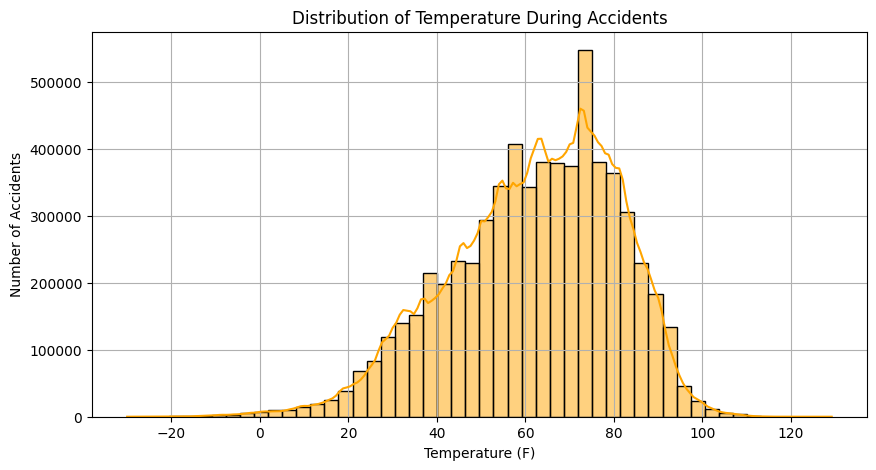

In [16]:
# تأثير درجة الحرارة على الحوادث

plt.figure(figsize=(10, 5))
sns.histplot(df['Temperature(F)'], bins=50, kde=True, color='orange')
plt.title('Distribution of Temperature During Accidents')
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Distribution_of_Temperature_During_Accidents.png", dpi=300, bbox_inches="tight")

plt.show()

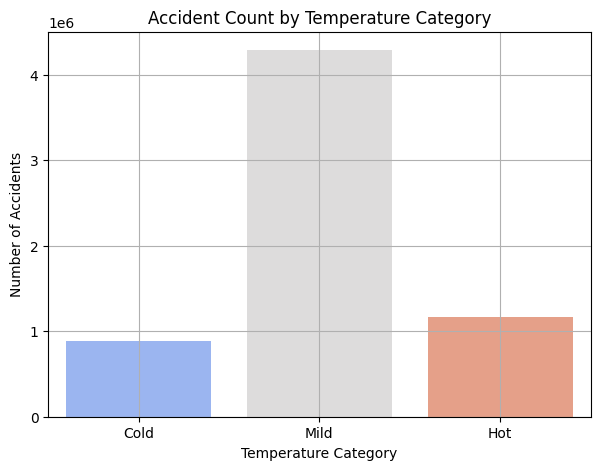

In [17]:
def temp_category(temp):
    if temp < 40:
        return 'Cold'
    elif temp < 80:
        return 'Mild'
    else:
        return 'Hot'

df['Temp_Category'] = df['Temperature(F)'].dropna().apply(temp_category)

plt.figure(figsize=(7, 5))
sns.countplot(x='Temp_Category', hue='Temp_Category', data=df, order=['Cold', 'Mild', 'Hot'], palette='coolwarm', legend=False)
plt.title('Accident Count by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Accident_Count_by_Temperature_Category.png", dpi=300, bbox_inches="tight")

plt.show()

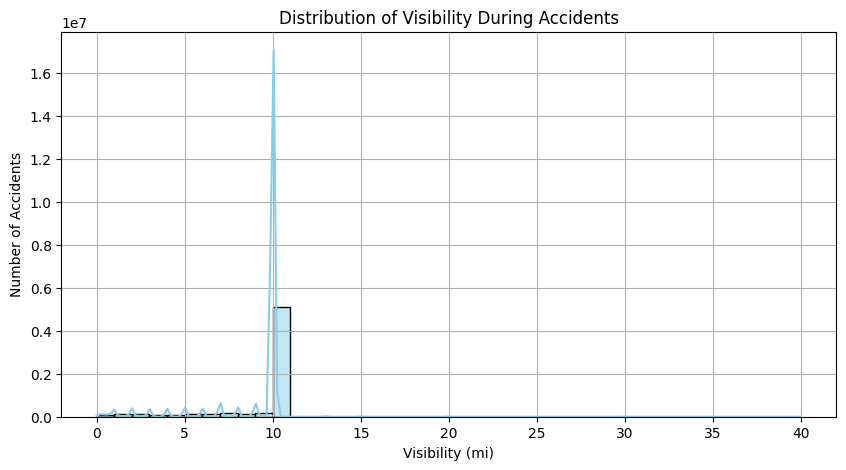

In [18]:
# العلاقة بين الرؤية و عدد الحوادث

plt.figure(figsize=(10, 5))
sns.histplot(df['Visibility(mi)'].dropna(), bins=40, kde=True, color='skyblue')
plt.title('Distribution of Visibility During Accidents')
plt.xlabel('Visibility (mi)')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Distribution_of_Visibility_During_Accidents.png", dpi=300, bbox_inches="tight")

plt.show()

C:\Users\Amer\AppData\Local\Temp\ipykernel_17412\3881175339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.values , y=weather_counts.index, palette='magma')


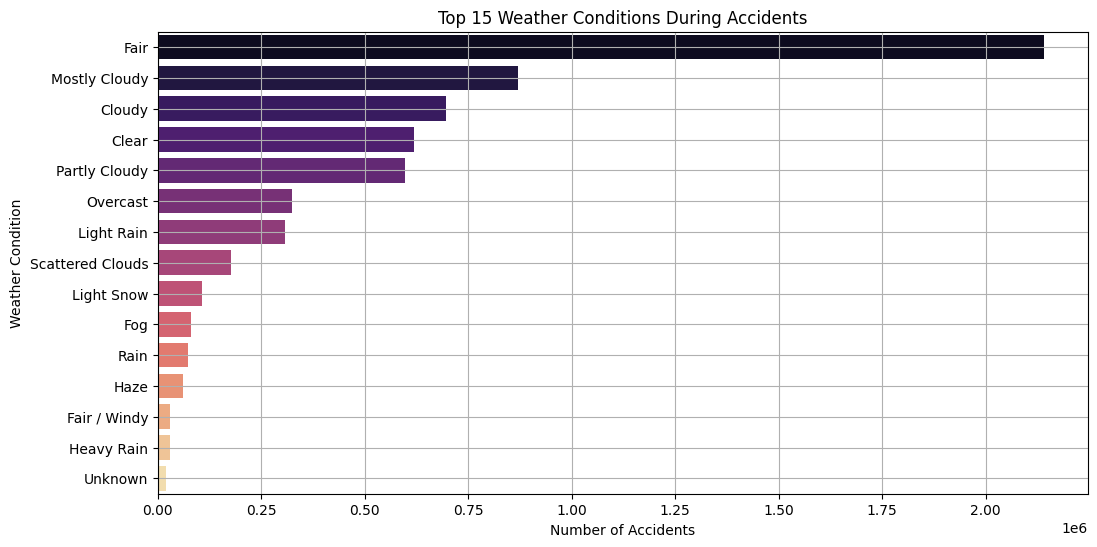

In [19]:
# (زيادة الحوادث مع حالة الجو (الضباب، الأمطار، الثلوج

weather_counts = df['Weather_Condition'].value_counts().nlargest(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=weather_counts.values , y=weather_counts.index, palette='magma')
plt.title('Top 15 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Top15_Weather_Conditions.png", dpi=300, bbox_inches="tight")

plt.show()

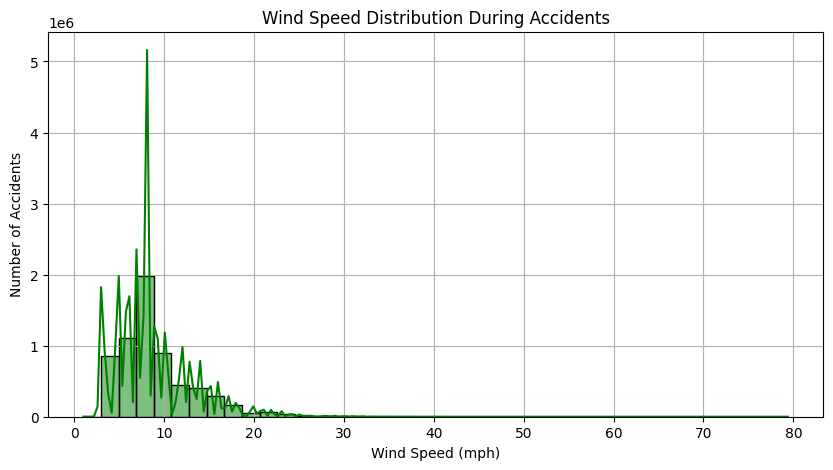

In [20]:
#تأثير سرعة الرياح 

plt.figure(figsize=(10, 5))
sns.histplot(df['Wind_Speed(mph)'].dropna(), bins=40, kde=True, color='green')
plt.title('Wind Speed Distribution During Accidents')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Wind_Speed_Distribution_During_Accidents.png", dpi=300, bbox_inches="tight")

plt.show()

C:\Users\Amer\AppData\Local\Temp\ipykernel_17412\1432233640.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wind_dir_counts.index, y=wind_dir_counts.values, palette='cubehelix')


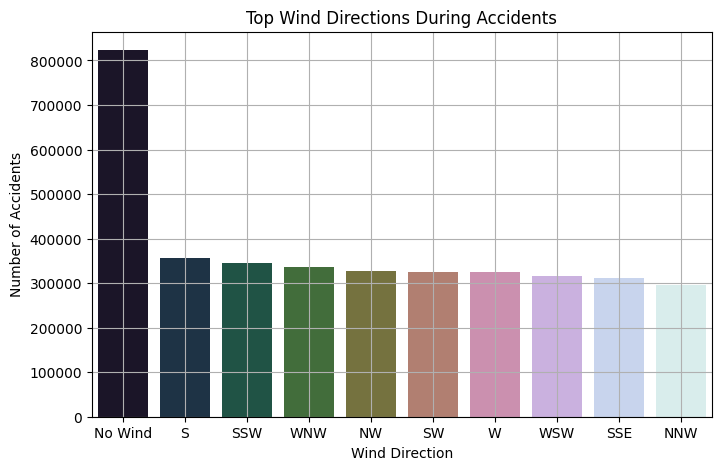

In [21]:
# تاثير اتجاه الرياح
wind_dir_counts = df['Wind_Direction'].value_counts().nlargest(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=wind_dir_counts.index, y=wind_dir_counts.values, palette='cubehelix')
plt.title('Top Wind Directions During Accidents')
plt.xlabel('Wind Direction')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Top_Wind_Directions_During_Accidents.png", dpi=300, bbox_inches="tight")

plt.show()

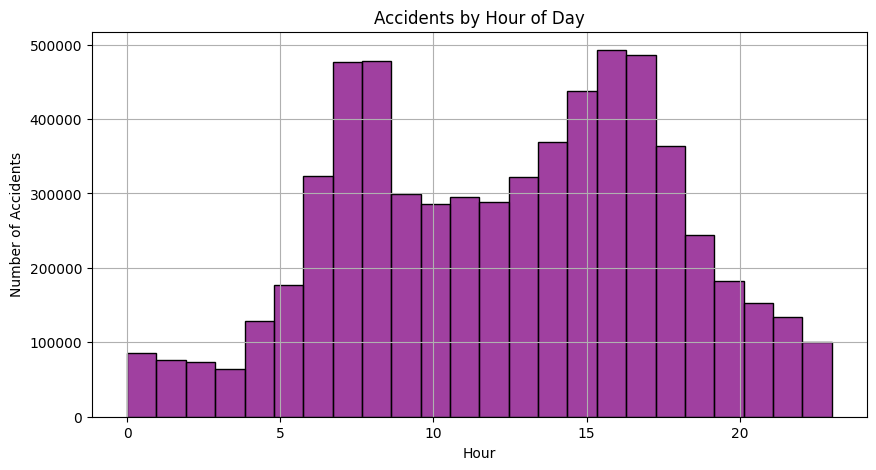

In [22]:
# الحوادث تزدا في وقت الشروق و لا الغروب

df['Hour'] = df['Start_Time'].dt.hour

plt.figure(figsize=(10, 5))
sns.histplot(df['Hour'], bins=24, kde=False, color='purple')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Accidents_by_Hour_of_Day.png", dpi=300, bbox_inches="tight")

plt.show()

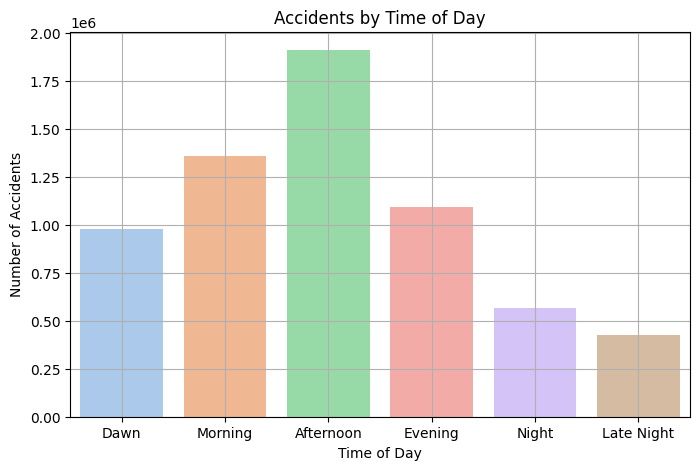

In [23]:
# Categorize time of day
def time_of_day(hour):
    if 5 <= hour < 8:
        return 'Dawn'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Late Night'

df['Time_Category'] = df['Hour'].apply(time_of_day)

plt.figure(figsize=(8, 5))
sns.countplot(x='Time_Category',hue='Time_Category', data=df, order=['Dawn', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'], palette='pastel')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Accidents_by_Time_of_Day.png", dpi=300, bbox_inches="tight")

plt.show()

🟢4.Road & Environment Analysis

In [24]:
environment_cols = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'
]

                 Accident_Count      True      False  True_%  False_%
Traffic_Signal           990490  990490.0  5345338.0   15.63    84.37
Crossing                 738453  738453.0  5597375.0   11.66    88.34
Junction                 468558  468558.0  5867270.0    7.40    92.60
Stop                     175710  175710.0  6160118.0    2.77    97.23
Station                  163816  163816.0  6172012.0    2.59    97.41
Amenity                   79004   79004.0  6256824.0    1.25    98.75
Railway                   55182   55182.0  6280646.0    0.87    99.13
Give_Way                  30476   30476.0  6305352.0    0.48    99.52
No_Exit                   16194   16194.0  6319634.0    0.26    99.74
Traffic_Calming            6183    6183.0  6329645.0    0.10    99.90
Bump                       2840    2840.0  6332988.0    0.04    99.96
Roundabout                  206     206.0  6335622.0    0.00   100.00


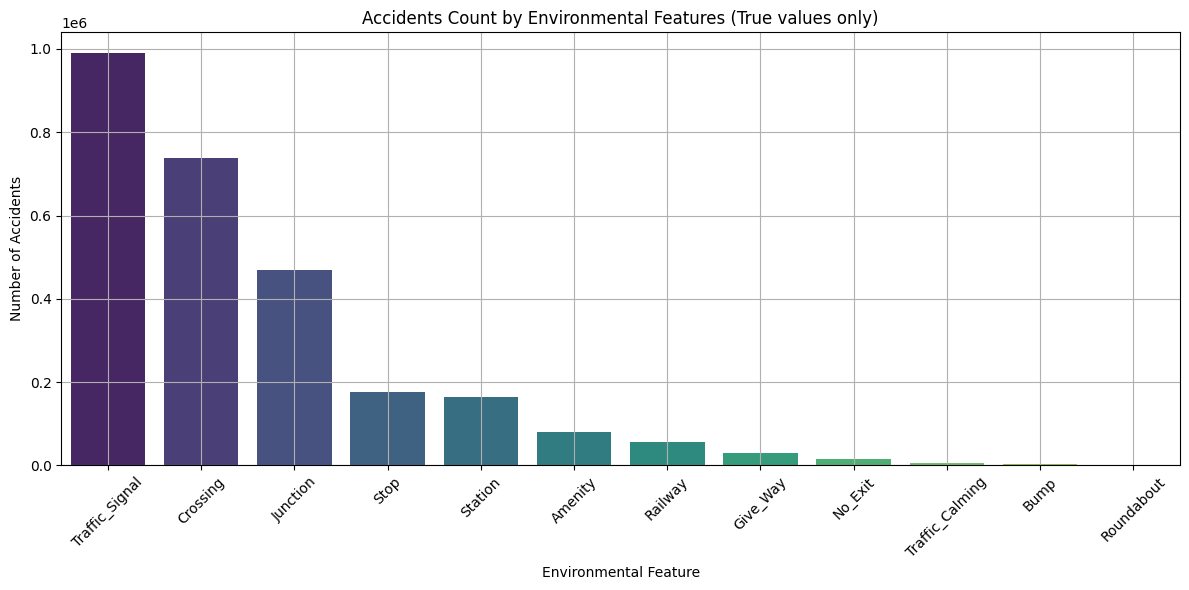

In [25]:
# مقارنة عدد الحوادث حسب كل خاصية بيئية


env_accidents = {col: df[col].sum() for col in environment_cols}
env_df = pd.DataFrame.from_dict(env_accidents, orient='index', columns=['Accident_Count'])

infra_stats = {}
for col in environment_cols:
    counts = df[col].value_counts()
    percentages = (counts / counts.sum()) * 100
    infra_stats[col] = {
        'True': counts.get(True, 0),
        'False': counts.get(False, 0),
        'True_%': round(percentages.get(True, 0), 2),
        'False_%': round(percentages.get(False, 0), 2)
    }

infra_df = pd.DataFrame(infra_stats).T

final_df = env_df.join(infra_df)

final_df.sort_values(by='Accident_Count', ascending=False, inplace=True)

print(final_df)

plt.figure(figsize=(12, 6))
sns.barplot(x=final_df.index, y='Accident_Count', data=final_df, hue=final_df.index, dodge=False, legend=False, palette='viridis')
plt.title('Accidents Count by Environmental Features (True values only)')
plt.xlabel('Environmental Feature')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/Accidents_Count_by_Environmental_Features.png", dpi=300, bbox_inches="tight")

plt.show()

C:\Users\Amer\AppData\Local\Temp\ipykernel_17412\2247572759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_df.index, y='Accident_Count', data=area_df, palette='rocket')


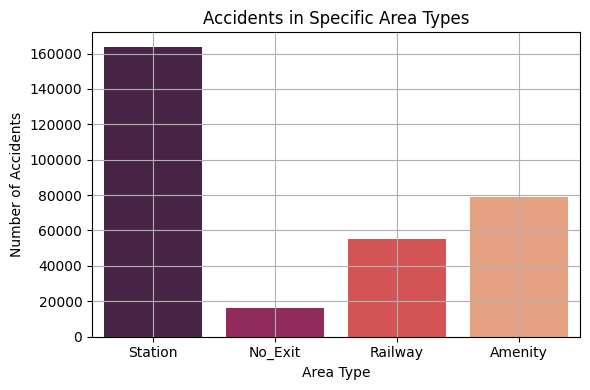

In [26]:
# مقارنة معدلات الحوادث حسب نوع المنطقة

area_cols = ['Station', 'No_Exit', 'Railway', 'Amenity']

area_counts = {col: df[col].sum() for col in area_cols}
area_df = pd.DataFrame.from_dict(area_counts, orient='index', columns=['Accident_Count'])

plt.figure(figsize=(6, 4))
sns.barplot(x=area_df.index, y='Accident_Count', data=area_df, palette='rocket')
plt.title('Accidents in Specific Area Types')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.grid(True)

plt.savefig("E:/accident_severity_analytics/reports/Accidents_in_Specific_Area_Types.png", dpi=300, bbox_inches="tight")

plt.show()

Traffic_Calming
False    6329645
True        6183
Name: count, dtype: int64
Traffic_Calming
False    99.9
True      0.1
Name: count, dtype: float64


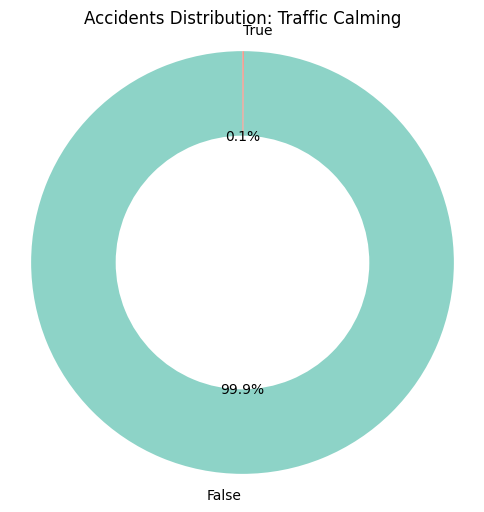

In [27]:
# إجمالي عدد الحوادث حسب وجود Traffic Calming
traffic_counts = df['Traffic_Calming'].value_counts()

traffic_percentages = (traffic_counts / traffic_counts.sum()) * 100

print(traffic_counts)
print(traffic_percentages.round(2))

plt.figure(figsize=(6, 6))
colors = ['#8dd3c7', '#fb8072']
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title('Accidents Distribution: Traffic Calming')
plt.axis('equal')

plt.savefig("E:/accident_severity_analytics/reports/Accidents_Distribution_by_Traffic_Calming.png", dpi=300, bbox_inches="tight")

plt.show()

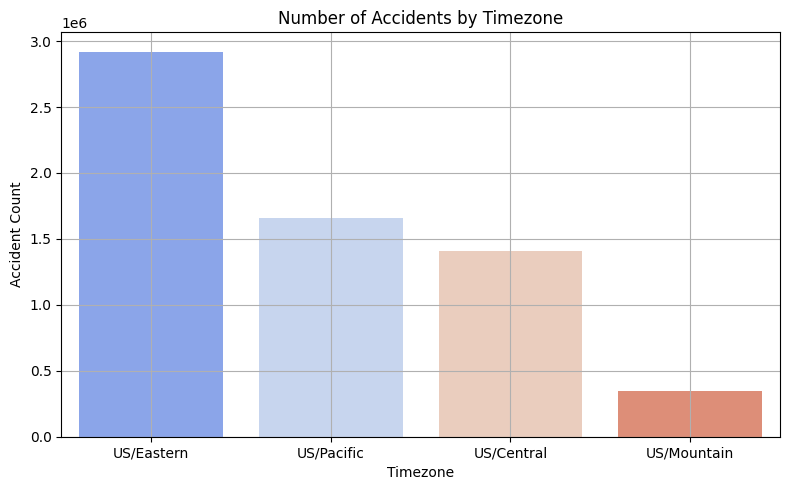

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Timezone', order=df['Timezone'].value_counts().index, 
              palette='coolwarm', hue='Timezone', legend=False)
plt.title('Number of Accidents by Timezone')
plt.xlabel('Timezone')
plt.ylabel('Accident Count')
plt.grid(True)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/Number_of_Accidents_by_Timezone.png", dpi=300, bbox_inches="tight")

plt.show()

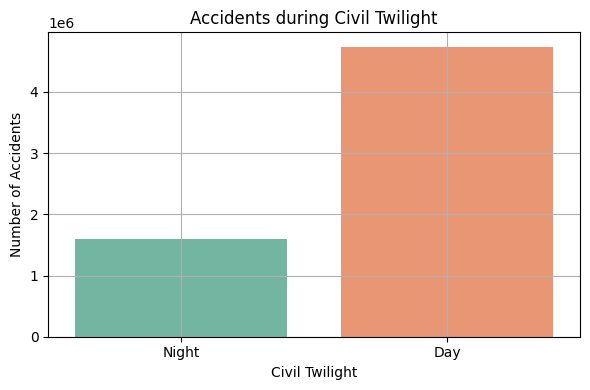

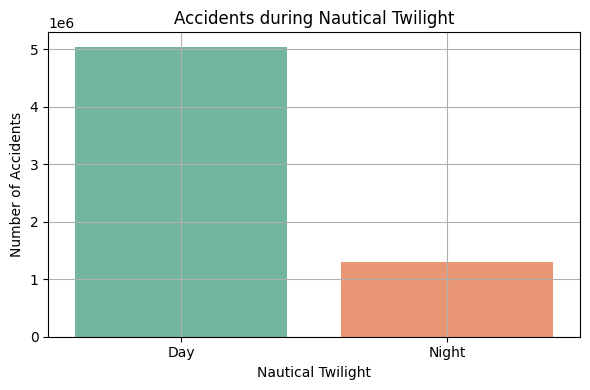

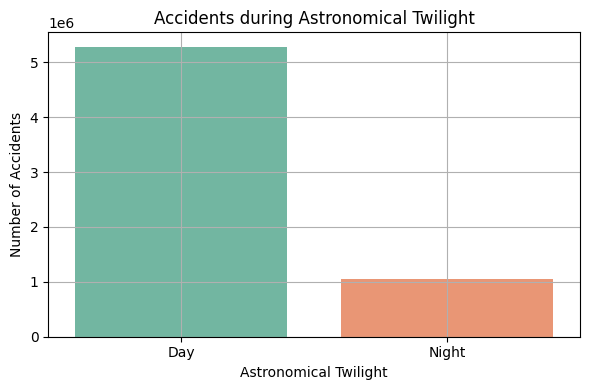

In [52]:
twilight_cols = ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

for col in twilight_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Accidents during {col.replace("_", " ")}')
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Number of Accidents')
    plt.grid(True)
    plt.tight_layout()

    filename = f"E:/accident_severity_analytics/reports/Accidents_during_{col}.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    plt.show()

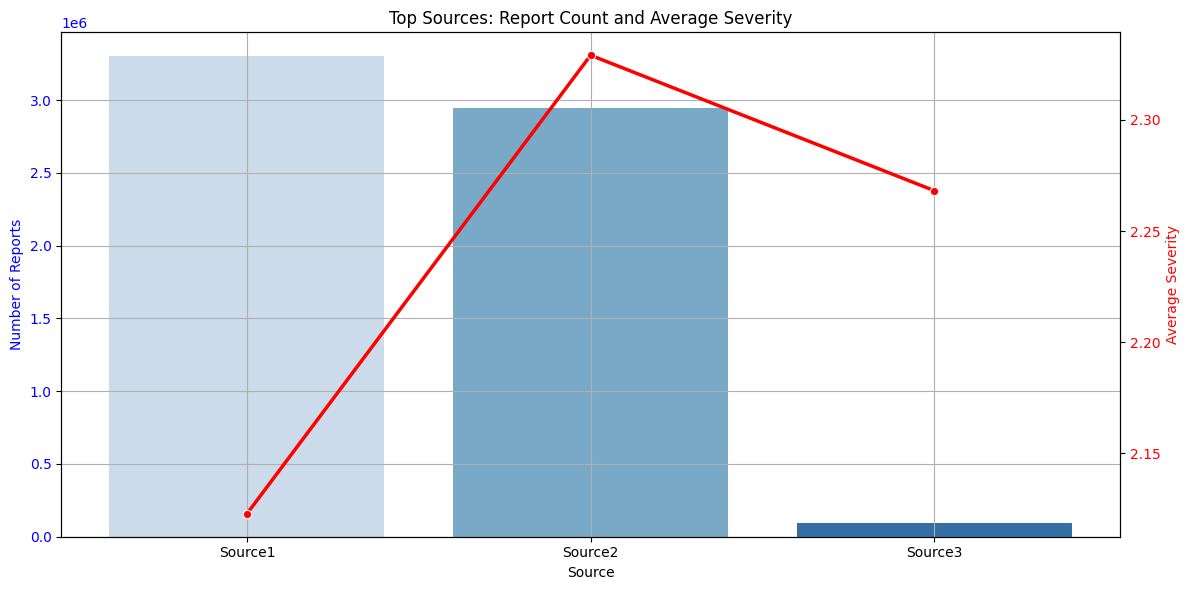

In [53]:
# 1. أعلى 10 مصادر من حيث عدد الحوادث
top_sources = df['Source'].value_counts().nlargest(10).reset_index()
top_sources.columns = ['Source', 'Report_Count']

# 2. نحسب متوسط الخطورة لكل مصدر منهم فقط
severity_avg = df[df['Source'].isin(top_sources['Source'])].groupby('Source')['Severity'].mean().reset_index()
severity_avg.columns = ['Source', 'Avg_Severity']

merged = pd.merge(top_sources, severity_avg, on='Source')


fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(data=merged, x='Source',hue='Source', y='Report_Count', palette='Blues', ax=ax1)
ax1.set_ylabel('Number of Reports', color='blue')
ax1.set_xlabel('Source')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Top Sources: Report Count and Average Severity')
ax1.grid(True)


ax2 = ax1.twinx()
sns.lineplot(data=merged, x='Source', y='Avg_Severity', color='red', marker='o', linewidth=2.5, ax=ax2)
ax2.set_ylabel('Average Severity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/Top_Sources_ReportCount_Severity.png", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
source_severity = df.pivot_table(index='Source', columns='Severity', aggfunc='size', fill_value=0)

top_sources = df['Source'].value_counts().nlargest(10).index
source_severity = source_severity.loc[top_sources]

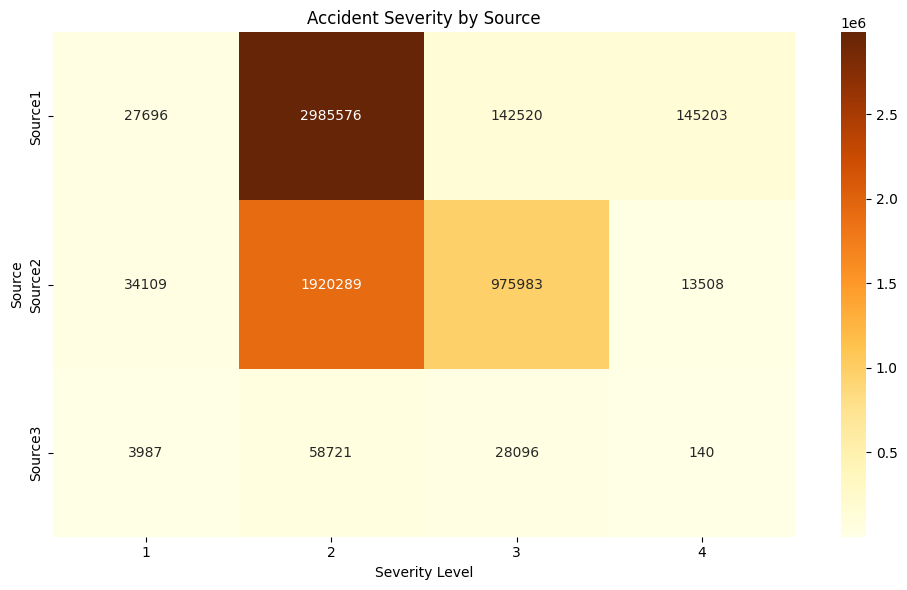

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(source_severity, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Accident Severity by Source')
plt.xlabel('Severity Level')
plt.ylabel('Source')
plt.tight_layout()

plt.savefig("E:/accident_severity_analytics/reports/Accidents_Severity_by_Source.png", dpi=300, bbox_inches="tight")

plt.show()